In [1]:
import pandas as pd

from data import search_documents

In [2]:
db = 'transcripts'
col = 'sentiment_textblob'
query = {}

In [3]:
# projections set to False for `sentence_breakdown` and `transcript` fields due to size
res = search_documents(db, col)

In [4]:
(res[0])

{'_id': ObjectId('62e06cb6fa4e354522cc2982'),
 'title': 'Anderson Cooper 360 Degrees',
 'date': 'Aired July 25, 2022 - 21:00 \xa0 ET',
 'polarity': 0.14768577394625143,
 'subjectivity': 0.4697661801269674,
 'percent_over_zero': 0.40823327615780447,
 'network': 'https://transcripts.cnn.com/show/acd/date/2022-07-25/segment/02'}

In [5]:
df = pd.DataFrame(res)

In [6]:
df['date'] = [item[6:] for item in df['date']]

In [7]:
df['date'] = pd.to_datetime(df['date'])

C:\Users\sayer\anaconda3\lib\site-packages\dateutil\parser\_parser.py:1207: UnknownTimezoneWarning: tzname ET identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


In [8]:
df['network'] = "cnn"

In [10]:
# df.drop(["_id", "transcript", 'sentence_breakdown'], axis=1, inplace=True)
df.set_index('date', inplace=True)

In [11]:
df

,_id,title,polarity,subjectivity,percent_over_zero,network
date,,,,,,
2022-07-25 21:00:00,62e06cb6fa4e354522cc2982,Anderson Cooper 360 Degrees,0.147686,0.469766,0.408233,cnn
2022-07-25 20:00:00,62e06cb7fa4e354522cc2983,Anderson Cooper 360 Degrees,0.101798,0.469625,0.358871,cnn
2022-07-22 20:00:00,62e06cb8fa4e354522cc2984,Anderson Cooper 360 Degrees,0.040762,0.401014,0.320574,cnn
2022-07-21 20:00:00,62e06cb9fa4e354522cc2985,Anderson Cooper 360 Degrees,0.000000,0.000000,0.000000,cnn
2022-07-20 20:00:00,62e06cb9fa4e354522cc2986,Anderson Cooper 360 Degrees,0.048333,0.446224,0.322660,cnn
...,...,...,...,...,...,...
2020-12-22 20:00:00,6320df248f1fc78866898a2c,Anderson Cooper 360 Degrees,0.069174,0.441884,0.359779,cnn
2020-12-21 20:00:00,6320df248f1fc78866898a2d,Anderson Cooper 360 Degrees,0.087942,0.418105,0.399538,cnn
2020-12-18 20:00:00,6320df258f1fc78866898a2e,Anderson Cooper 360 Degrees,0.089702,0.444765,0.397959,cnn


<AxesSubplot:xlabel='date'>

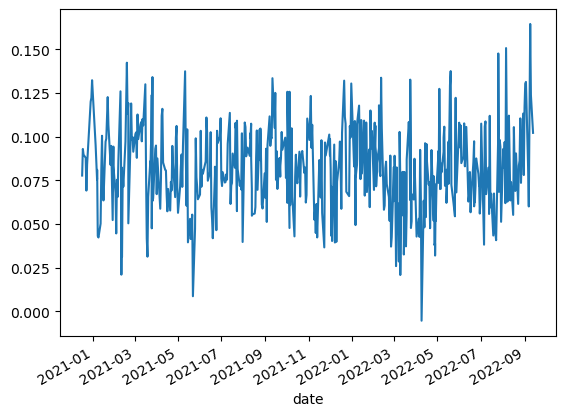

In [12]:
df['polarity'][df['polarity'] != 0].plot()

<AxesSubplot:xlabel='date'>

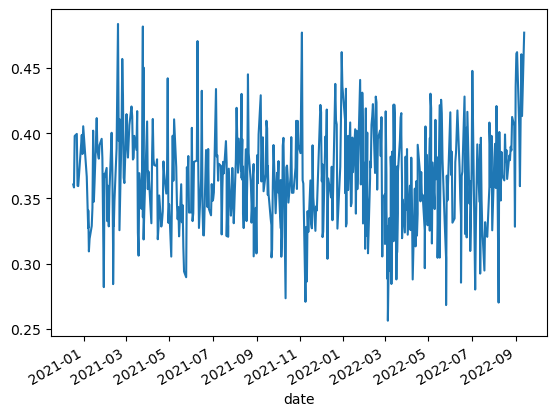

In [13]:
# This references a feature created from the sentence-by-sentence breakdown and sentiment analysis
# It's the percentage of that days broadcast's sentences that got rated > 0
df['percent_over_zero'][df['percent_over_zero'] != 0].plot()

<AxesSubplot:xlabel='date'>

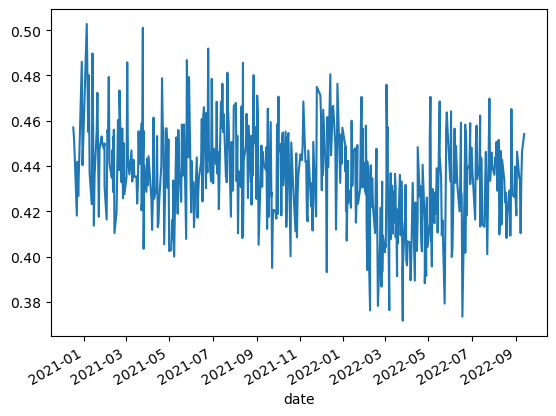

In [14]:
df['subjectivity'][df['subjectivity'] != 0].plot()

In [15]:
df['polarity'][df['polarity'] != 0]

date
2022-07-25 21:00:00    0.147686
2022-07-25 20:00:00    0.101798
2022-07-22 20:00:00    0.040762
2022-07-20 20:00:00    0.048333
2022-07-19 20:00:00    0.067495
                         ...   
2020-12-22 20:00:00    0.069174
2020-12-21 20:00:00    0.087942
2020-12-18 20:00:00    0.089702
2020-12-17 20:00:00    0.093010
2020-12-16 20:00:00    0.077772
Name: polarity, Length: 525, dtype: float64

In [ ]:
# import os
# import glob
# import json

# filepath = "data/acd"
# json_files = glob.glob(os.path.join(filepath, '*.json'))
# json_files = [os.path.normpath(item) for item in json_files]
# json_files = [item.replace("\\", "/") for item in json_files]